# Project: Employee Turnover Analytics – Joana Coyle

## Step 1: Perform data quality checks by checking for missing values, if any.   

*Techniques Performed and Observations*

♦ *Downloaded and imported all required libraries.*

♦ *Loaded the dataset and reviewed the first 5 rows.*

♦ *Saved an untouched copy of the original dataset to preserve integrity.*

♦ *Checked dataset shape and confirmed no duplicates using the duplicated function.*

♦ *Ran df.info(memory_usage='deep'), created a DataFrame with numeric columns only, and* *applied downcasting to reduce memory usage from 2.5 MB to 1.9 MB.*

♦ *Verified there were no missing values.*

♦ *Used the isin function to identify binary columns.*

♦ *Created a DataFrame of categorical columns and applied .value_counts() to review the* *distribution of classes.*

♦ *Used the numeric-only DataFrame with .describe(). Key insights observed:*

*Average monthly hours vary widely, from 96 to 320.*

*Satisfaction level ranges between 0.09 and 0.82, with an average of 0.61.*

*Employees are typically involved in 2 to 7 projects.*

*Tenure ranges from 2 to 10 years.*

*From these findings, I infer that there are clear gaps and differences among employees. I will explore these further through detailed EDA.*

*The visualization suggests that:*  

♦ *Most employees work between 150 and 250 hours per month.*  

♦ *There are two peaks: one around 150 hours and another near 250 hours.*  

♦ *Very few employees work less than 100 hours or more than 300 hours per month.*  

♦ *Workload varies greatly, ranging from about 90 to 300 hours per month.*

In [1]:
!brew install python@3.12

/bin/bash: line 1: brew: command not found


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
!pip install --upgrade --force-reinstall --no-cache-dir "numpy==2.1.*"*"
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import GridSearchCV


/bin/bash: -c: line 1: unexpected EOF while looking for matching `"'
/bin/bash: -c: line 2: syntax error: unexpected end of file


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
ls /content/drive/MyDrive

'23672909496_d27bb94bab_o (1).png'
 23672909496_d27bb94bab_o.png
'Colab Notebooks'/
'data sets '/
 e-books/
'(F) 120. CocP. Prop.Básica.completa Joana santos 19.07.08.gdoc'
'Google Merchant Center feed - produtos 22.10.2019.gsheet'
'Google Merchant Center feed - produtos.gsheet'
 HPSCAN_20240116171532944_2024-01-16_171707201.pdf
'HR_comma_sep (1).csv'
 HR_comma_sep.csv
'J & P Trip to Greece  Sept 24 - Oct 9th  .gmap'
 Montreal.gmap
 pauls.drivers.lic.jpg
'PROCURAÇÃO JOANA.docx.gdoc'
 resume.2025/
'Screenshot 2025-03-11 at 12.40.46 PM.png'
 SIMPLILEARN/
'VISION BOARD'/


In [5]:
path = "/content/drive/MyDrive/data sets /"

In [6]:
df = pd.read_csv(path + 'HR_comma_sep.csv')
display(df.head())

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
original_df= df.copy()
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [8]:
df.shape

(14999, 10)

In [9]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
14994,True
14995,True
14996,True
14997,True


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [11]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 2.5 MB


In [12]:
df_numeric = df.select_dtypes(include='number')
df_numeric.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years'],
      dtype='object')

In [13]:
df[df_numeric.columns] = df_numeric.apply(pd.to_numeric, downcast='integer')

In [14]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int8   
 3   average_montly_hours   14999 non-null  int16  
 4   time_spend_company     14999 non-null  int8   
 5   Work_accident          14999 non-null  int8   
 6   left                   14999 non-null  int8   
 7   promotion_last_5years  14999 non-null  int8   
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int16(1), int8(5), object(2)
memory usage: 1.9 MB


In [15]:
df.isnull().sum()


,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
sales,0
salary,0


In [16]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [17]:
print(df.select_dtypes(include=['number']).isin([0,1]).all())

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident             True
left                      True
promotion_last_5years     True
dtype: bool


In [18]:
cat_cols = ['left', 'sales', 'salary', 'Work_accident']

for col in cat_cols:
    print(f'Unique values for {col}: {df[col].unique()}')

Unique values for left: [1 0]
Unique values for sales: ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
Unique values for salary: ['low' 'medium' 'high']
Unique values for Work_accident: [0 1]


In [19]:
print("Sales counts:\n", df['sales'].value_counts())
print("\nSalary counts:\n", df['salary'].value_counts())

Sales counts:
 sales
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

Salary counts:
 salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64


In [20]:
df[df_numeric.columns]. describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## Step 2: Understand what factors contributed most to employee turnover at EDA.            

   ### Step 2.1: Draw a heatmap of the correlation matrix between all numerical features or columns in the data.

Techniques Performed and Observations:

♦ *Created a DataFrame containing numerical columns (excluding binary variables) and used it to generate a* *correlation matrix and heatmap.*

♦ *Findings:*

*No columns show strong correlations; most relationships are weak to moderate.*

*average_monthly_hours and number_project are moderately correlated.*

*number_project and last_evaluation are also moderately correlated.*

*satisfaction_level has a weak negative correlation with number_project.*

In [21]:
df_numeric_no_Binary = df_numeric.drop(columns=['left', 'Work_accident', 'promotion_last_5years'])
df_numeric_no_Binary.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company'],
      dtype='object')

In [22]:
corr = df[df_numeric_no_Binary.columns].corr()
print(corr)

                      satisfaction_level  last_evaluation  number_project  \
satisfaction_level              1.000000         0.105021       -0.142970   
last_evaluation                 0.105021         1.000000        0.349333   
number_project                 -0.142970         0.349333        1.000000   
average_montly_hours           -0.020048         0.339742        0.417211   
time_spend_company             -0.100866         0.131591        0.196786   

                      average_montly_hours  time_spend_company  
satisfaction_level               -0.020048           -0.100866  
last_evaluation                   0.339742            0.131591  
number_project                    0.417211            0.196786  
average_montly_hours              1.000000            0.127755  
time_spend_company                0.127755            1.000000  


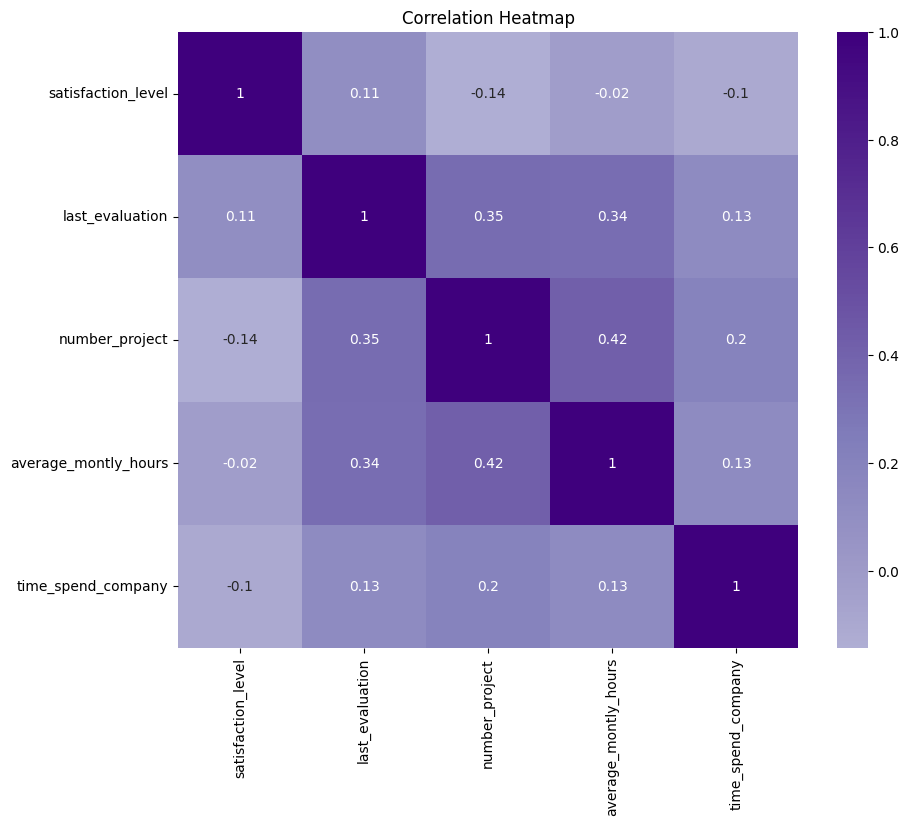

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="Purples", center=0)
plt.title("Correlation Heatmap")
plt.show()

### Step 2.2: Draw the distribution plot of:

#### Employee Satisfaction (use column satisfaction_level)

 *The plot shows that:*   

♦ *Most employees report satisfaction between 0.6 and 0.9, peaking around 0.8*

♦ *Satisfaction levels range widely, from nearly 0.0 to 1.0, showing big differences among employees.*  

♦ *This suggests two main groups: one satisfied and engaged, and another dissatisfied and potentially at* *risk of leaving.*


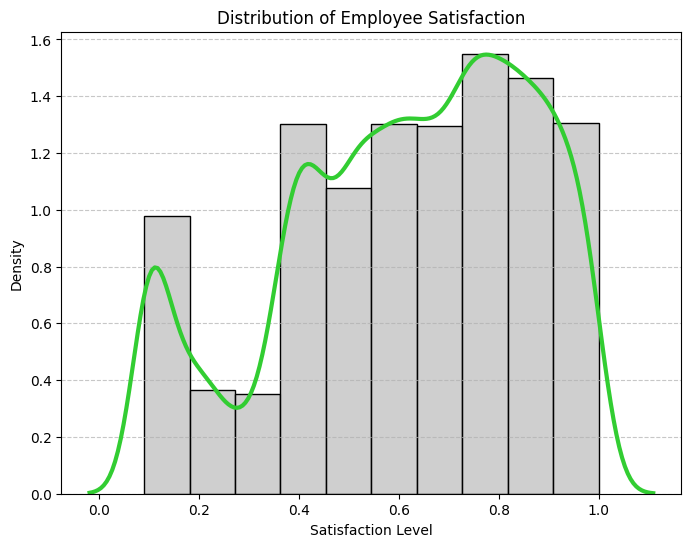

In [24]:
plt.figure(figsize=(8,6))

sns.histplot(df['satisfaction_level'], bins=10, color="silver", stat="density")

sns.kdeplot(df['satisfaction_level'], color="limegreen", linewidth=3)

plt.title("Distribution of Employee Satisfaction")
plt.xlabel("Satisfaction Level")
plt.ylabel("Density")

plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

#### Employee Evaluation (use column last_evaluation)

*Based on the plot, we can see that:*  

♦ *Most employees have evaluation scores between 0.5 and 0.9.*

♦ *There are two clear peaks: one around 0.55 and another near 0.85–0.9.*

♦ *Very few employees scored below 0.4 or above 1.0.*


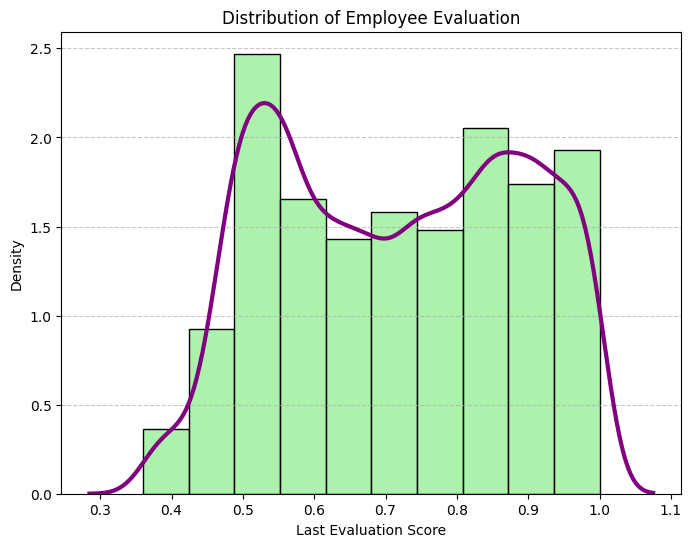

In [25]:
plt.figure(figsize=(8,6))

sns.histplot(df['last_evaluation'], bins=10, color="lightgreen", stat="density")

sns.kdeplot(df['last_evaluation'], color="purple", linewidth=3)

plt.title("Distribution of Employee Evaluation")
plt.xlabel("Last Evaluation Score")
plt.ylabel("Density")

plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


#### Employee Average Monthly Hours (use column average_montly_hours)

*The visualization suggests that:*  

♦ *Most employees work between 150 and 250 hours per month.*  

♦ *There are two peaks: one around 150 hours and another near 250 hours.*  

♦ *Very few employees work less than 100 hours or more than 300 hours per month.*  

♦ *Workload varies greatly, ranging from about 90 to 300 hours per month.*

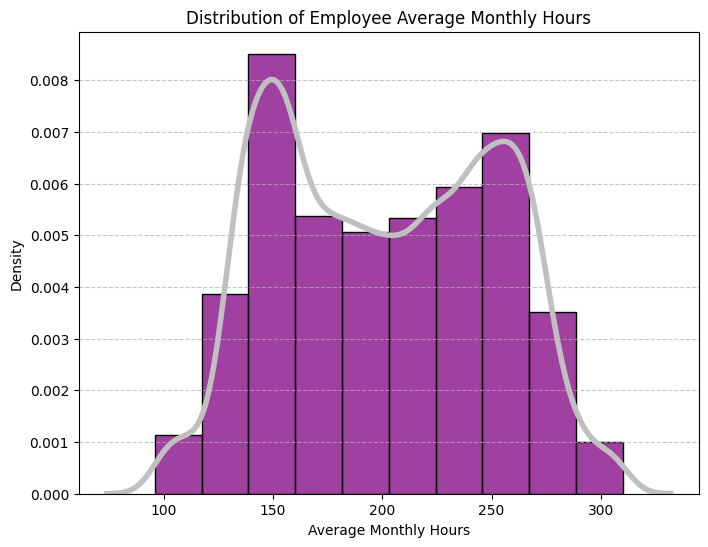

In [26]:
plt.figure(figsize=(8,6))

sns.histplot(df['average_montly_hours'], bins=10, color="purple", stat="density")

sns.kdeplot(df['average_montly_hours'], color="silver", linewidth=4)

plt.title("Distribution of Employee Average Monthly Hours")
plt.xlabel("Average Monthly Hours")
plt.ylabel("Density")

plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

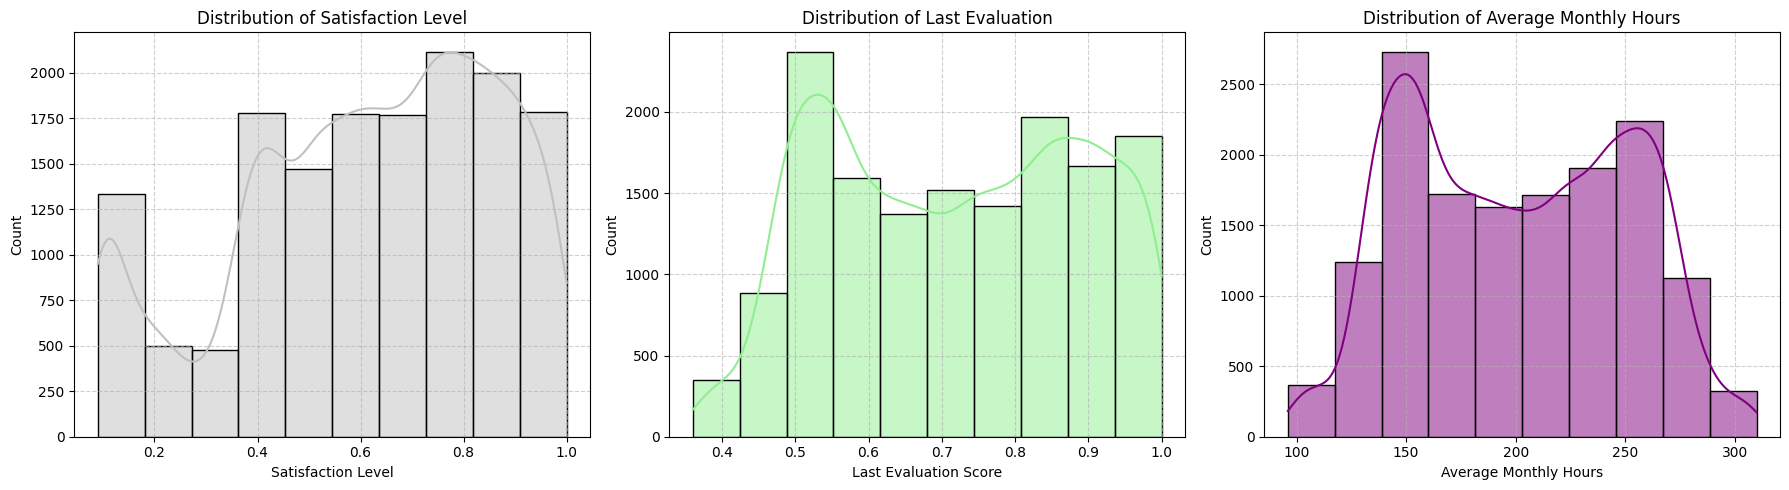

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.histplot(df['satisfaction_level'], bins=10, kde=True, color="silver", ax=axes[0])
axes[0].set_title("Distribution of Satisfaction Level")
axes[0].set_xlabel("Satisfaction Level")
axes[0].set_ylabel("Count")
axes[0].grid(True, linestyle="--", alpha=0.6)

sns.histplot(df['last_evaluation'], bins=10, kde=True, color="lightgreen", ax=axes[1])
axes[1].set_title("Distribution of Last Evaluation")
axes[1].set_xlabel("Last Evaluation Score")
axes[1].set_ylabel("Count")
axes[1].grid(True, linestyle="--", alpha=0.6)

sns.histplot(df['average_montly_hours'], bins=10, kde=True, color="purple", ax=axes[2])
axes[2].set_title("Distribution of Average Monthly Hours")
axes[2].set_xlabel("Average Monthly Hours")
axes[2].set_ylabel("Count")
axes[2].grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

### Step 2.3: Draw the bar plot of the employee project count of both employees who left and stayed in the organization (use column number_project and hue column left), and give your inferences from the plot.

*From the chart, it appears that:*  

♦ *Most employees who stayed worked on 3–4 projects.*  

♦ *Employees with only 2 projects often left.*  

♦ *Employees with 6–7 projects also left more than they stayed.*  

♦ *A balanced workload (3–5 projects) is linked to higher retention.*


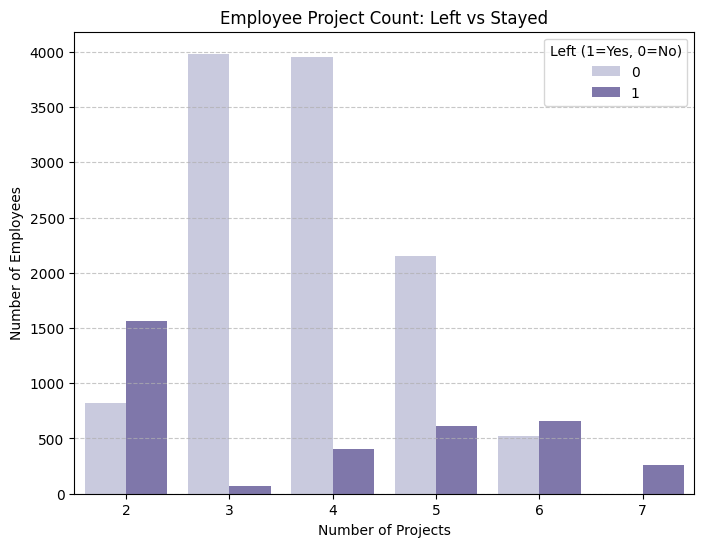

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(x="number_project", hue="left", data=df, palette="Purples")

plt.title("Employee Project Count: Left vs Stayed")
plt.xlabel("Number of Projects")
plt.ylabel("Number of Employees")
plt.legend(title="Left (1=Yes, 0=No)")

plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

#### The data in the subplots below shows that:

Employees by Time Spent in Company  

♦ *Most employees stayed 2–3 years.*  

♦ *Leavers are more common around 3–5 years.*  

♦ *Very few employees stay beyond 6+ years.*  

Employees by Salary Level  

♦ *Most employees are in the low and medium salary groups.*  

♦ *Employees with low salary leave more often than those with higher salaries.*  

♦ *Very few employees have a high salary, and they rarely leave.*

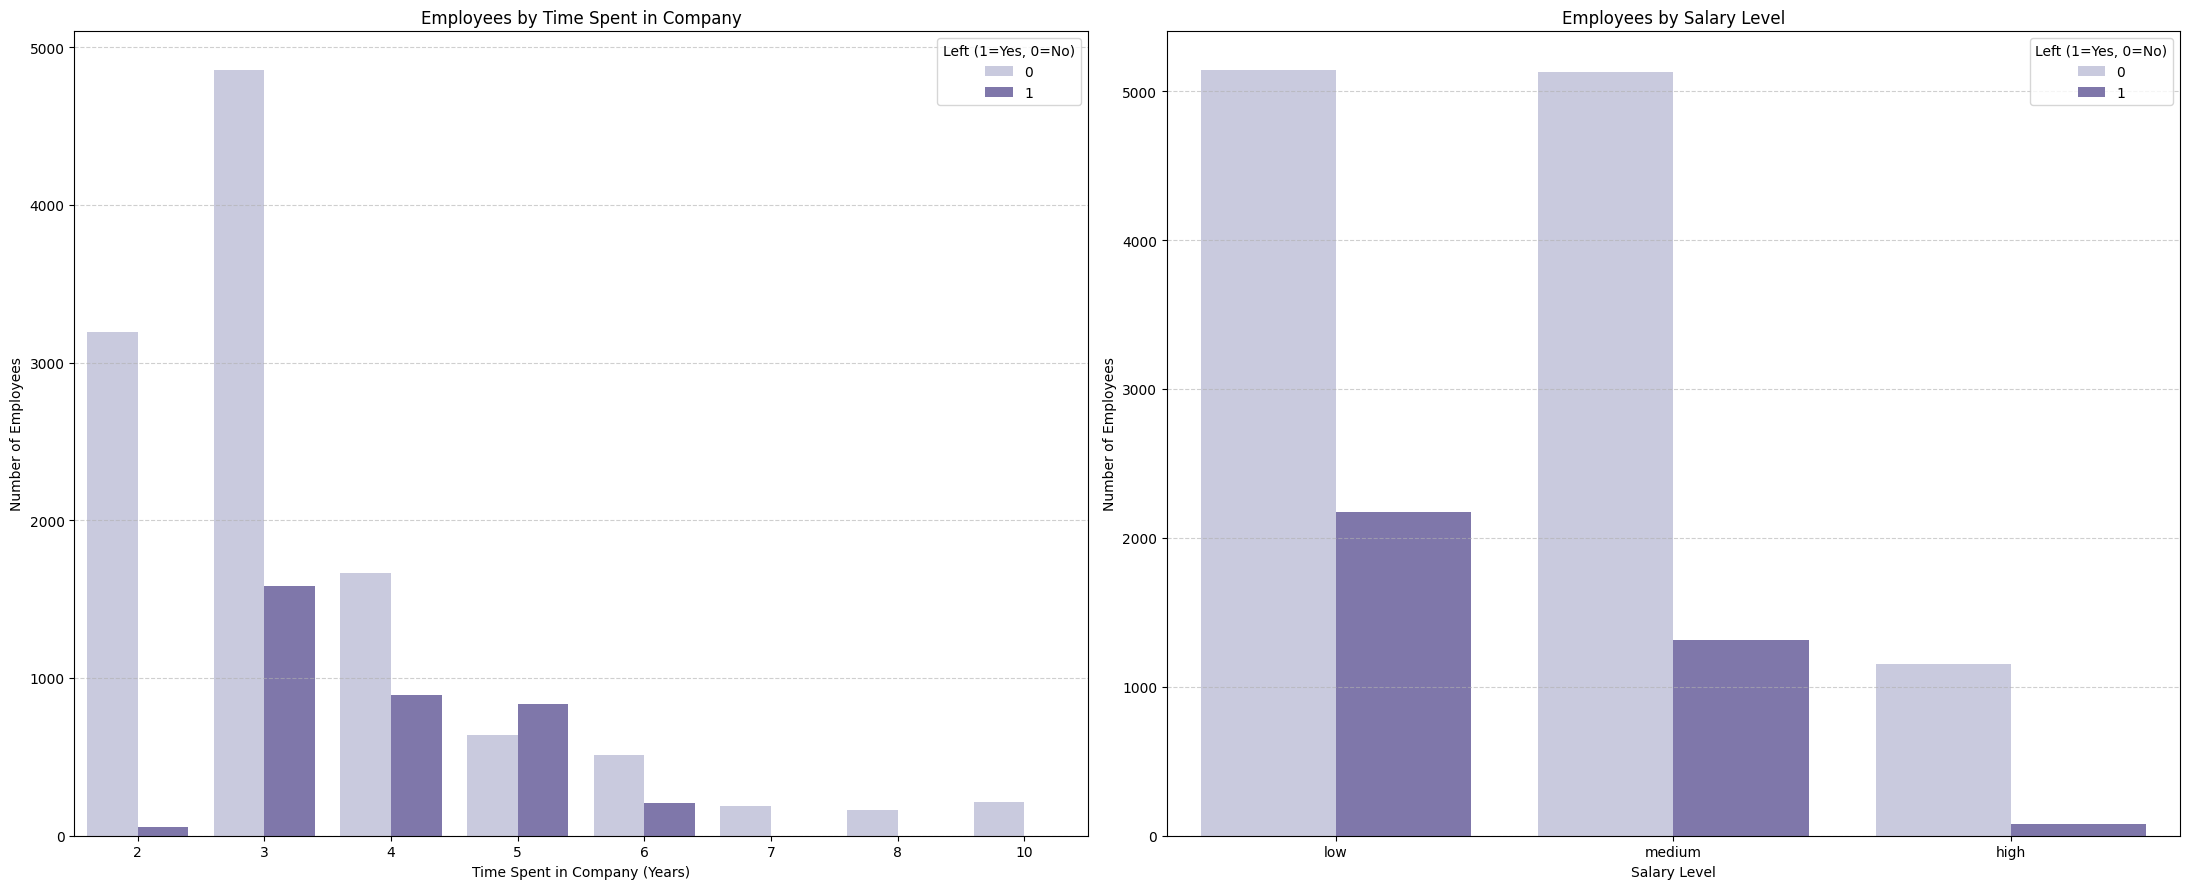

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(22,9))

sns.countplot(x="time_spend_company", hue="left", data=df, palette="Purples", ax=axes[0])
axes[0].set_title("Employees by Time Spent in Company")
axes[0].set_xlabel("Time Spent in Company (Years)")
axes[0].set_ylabel("Number of Employees")
axes[0].grid(axis="y", linestyle="--", alpha=0.6)
axes[0].legend(title="Left (1=Yes, 0=No)")

sns.countplot(x="salary", hue="left", data=df, palette="Purples", ax=axes[1])
axes[1].set_title("Employees by Salary Level")
axes[1].set_xlabel("Salary Level")
axes[1].set_ylabel("Number of Employees")
axes[1].grid(axis="y", linestyle="--", alpha=0.6)
axes[1].legend(title="Left (1=Yes, 0=No)")



plt.tight_layout()


*The data in the subplots below shows that:*

Satisfaction vs Number of Projects  

♦ *Employees with only 2 projects have much lower satisfaction and are more likely to leave.*  

♦ *Satisfaction is higher for employees with 3–5 projects, and most of them stayed.*  

♦ *Employees with 6–7 projects show very low satisfaction and higher turnover.*  

Satisfaction vs Time Spent in Company  

♦ *Satisfaction is consistently higher for employees who stayed.*  

♦ *Those who left often show lower satisfaction, especially around 3–4 years.*  

♦ *At 6 years, some employees left despite high satisfaction.*  

Satisfaction vs Promotion (Last 5 Years)  

♦ *Employees who stayed show higher satisfaction than those who left, regardless of promotion.*  

♦ *Without promotion, those who stayed are more satisfied than those who left.*  

♦ *Employees who got promoted are slightly more satisfied overall, though some still left.*  


/tmp/ipython-input-4048745454.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-4048745454.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-4048745454.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


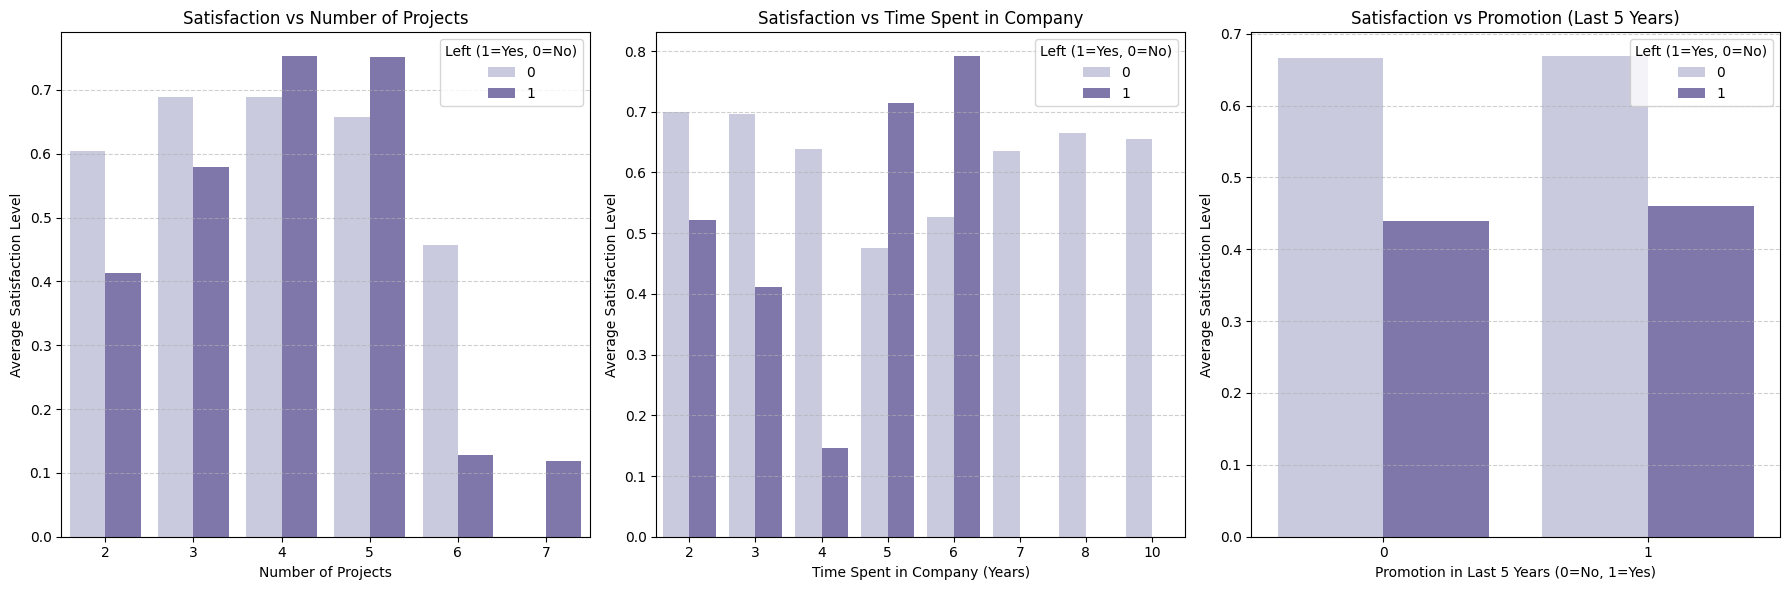

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Satisfaction vs Number of Projects
sns.barplot(
    x="number_project", y="satisfaction_level", hue="left",
    data=df, palette="Purples", ax=axes[0], ci=None
)
axes[0].set_title("Satisfaction vs Number of Projects")
axes[0].set_xlabel("Number of Projects")
axes[0].set_ylabel("Average Satisfaction Level")
axes[0].grid(axis="y", linestyle="--", alpha=0.6)
axes[0].legend(title="Left (1=Yes, 0=No)")

# Satisfaction vs Time Spent in Company
sns.barplot(
    x="time_spend_company", y="satisfaction_level", hue="left",
    data=df, palette="Purples", ax=axes[1], ci=None
)
axes[1].set_title("Satisfaction vs Time Spent in Company")
axes[1].set_xlabel("Time Spent in Company (Years)")
axes[1].set_ylabel("Average Satisfaction Level")
axes[1].grid(axis="y", linestyle="--", alpha=0.6)
axes[1].legend(title="Left (1=Yes, 0=No)")

# Satisfaction vs Promotion in Last 5 Years
sns.barplot(
    x="promotion_last_5years", y="satisfaction_level", hue="left",
    data=df, palette="Purples", ax=axes[2], ci=None
)
axes[2].set_title("Satisfaction vs Promotion (Last 5 Years)")
axes[2].set_xlabel("Promotion in Last 5 Years (0=No, 1=Yes)")
axes[2].set_ylabel("Average Satisfaction Level")
axes[2].grid(axis="y", linestyle="--", alpha=0.6)
axes[2].legend(title="Left (1=Yes, 0=No)")

plt.tight_layout()
plt.show()


### The data in the plot below shows that:

Work Accidents: Left vs Stayed

♦ *Most employees never had a work accident (0).*  

♦ *Among those with no accidents, a large group still left the company.*  

♦ *Employees who had an accident (1) are fewer, and most of them actually stayed.*

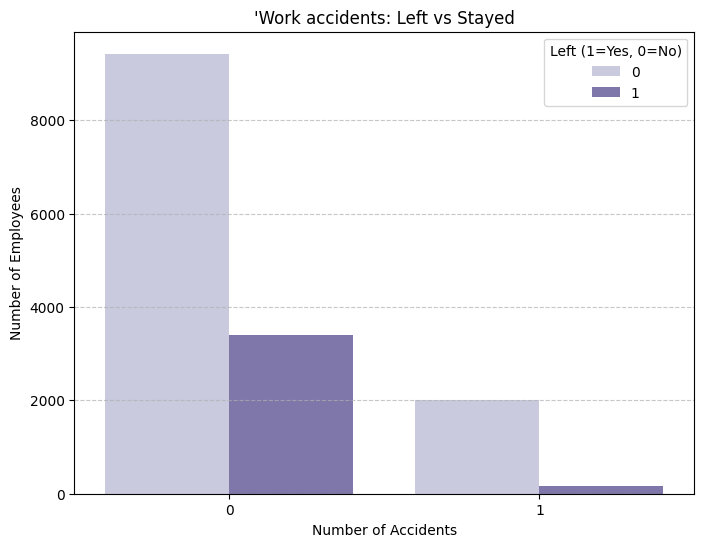

In [31]:
plt.figure(figsize=(8,6))
sns.countplot(x='Work_accident', hue="left", data=df, palette="Purples")

plt.title("'Work accidents: Left vs Stayed")
plt.xlabel("Number of Accidents")
plt.ylabel("Number of Employees")
plt.legend(title="Left (1=Yes, 0=No)")

plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

## Step 3: Perform clustering of employees who left based on their satisfaction and evaluation

### Step 3.1: Choose columns satisfaction_level, last_evaluation, and left.

In [32]:
df_left = df[df['left'] == 1]
df_left = df[df['left'] == 1][['satisfaction_level', 'last_evaluation']]


### Step 3.2: Do K-means clustering of employees who left the company into 3 clusters.

In [33]:
kmeans = KMeans(n_clusters=3, random_state=10)
df_left['cluster'] = kmeans.fit_predict(df_left)
df_left['cluster'].value_counts()


,count
cluster,
2,1650
0,977
1,944


### Step 3.3: Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.

*Looking at the plot, we observe that:*  

♦ *Blue Cluster*  
*High satisfaction and high evaluation but they still left.*  
*Good performers, happy at work, but still left.*

♦ *Red Cluster*  
*Very low satisfaction and very high evaluation.*  
*Good performers but unhappy.*

♦ *Yellow Cluster*  
*Medium satisfaction and medium evaluation.*  
*Average employees who left.*

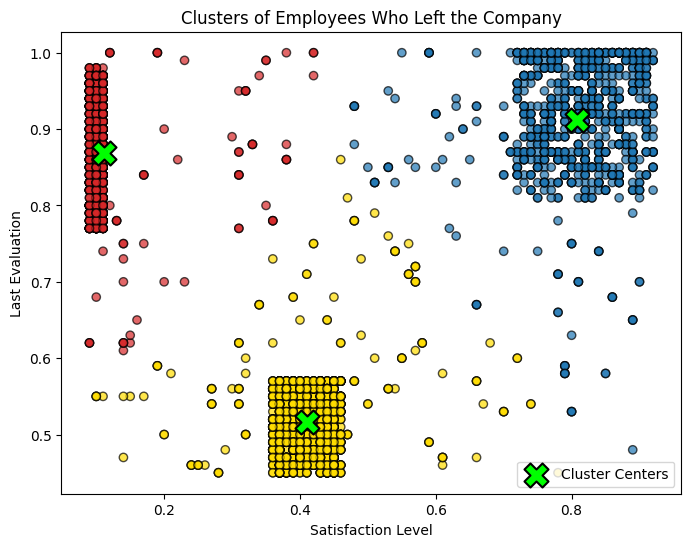

In [34]:
centers = kmeans.cluster_centers_

colors = ["#1f77b4", "#d62728", "#ffdd00"]
center_color = "#00ff00"

plt.figure(figsize=(8,6))

plt.scatter(
    df_left['satisfaction_level'],
    df_left['last_evaluation'],
    c=df_left['cluster'].map({0:colors[0], 1:colors[1], 2:colors[2]}),
    alpha=0.7, edgecolor="k"
)

plt.scatter(
    centers[:,0], centers[:,1],
    c=center_color, s=300, marker='X', edgecolor="black", linewidth=1.5, label="Cluster Centers"
)

plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('Clusters of Employees Who Left the Company')
plt.legend()
plt.show()


## Step 4:	Handle the left Class Imbalance using the SMOTE technique.

### 4.1.	Pre-process the data by converting categorical columns to numerical columns by:
■	Separating categorical variables and numeric variables  

■	Applying get_dummies() to the categorical variables  

■	Combining categorical variables and numeric variables


Techniques Performed and Observations:  

♦ *Checked the data type of the target column (left) to confirm whether conversion was needed.*

♦ *Splited the data into features and target.*  

♦ *Processed the training data (X):*  
   • *Split into numeric and categorical DataFrames*  
   • *Converted categorical columns into numeric using one-hot encoding*  
   • *Used drop_first=True to remove one dummy per category*  
                          (avoids redundancy/*multicollinearity)*  
   • *Merged numeric and dummy DataFrames side by side (axis=1)*


In [35]:
print(df['left'].dtype)
print(df['left'].unique())
print(df['left'].value_counts())

int8
[1 0]
left
0    11428
1     3571
Name: count, dtype: int64


In [36]:
y = df['left']
X = df.drop(columns=['left'])

In [37]:
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(exclude=['object']).columns

In [38]:
X_cat = X[cat_cols]
X_num = X[num_cols]
X_cat.columns

Index(['sales', 'salary'], dtype='object')

In [39]:
X_cat_dummies = pd.get_dummies(X[cat_cols], drop_first=True, dtype=int)

In [40]:
X_enc = pd.concat([X_num, X_cat_dummies], axis=1)

In [41]:
print("Object cols in X_enc:", X_enc.select_dtypes('object').columns.tolist())
print("Unique dtypes in X_enc:", X_enc.dtypes.unique())

Object cols in X_enc: []
Unique dtypes in X_enc: [dtype('float64') dtype('int8') dtype('int16') dtype('int64')]


In [42]:
print("Shape before:", X.shape)
print("Shape after:", X_enc.shape)
X_enc.head()

Shape before: (14999, 9)
Shape after: (14999, 18)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0


### 4.2.   Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X_enc,
    y,
    test_size=0.2,
    stratify=y,
    random_state=123
)

###  4.3.  Upsample the train dataset using the SMOTE technique from the imblearn module.

In [44]:
print("Before SMOTE (train):")
print(y_train.value_counts())

Before SMOTE (train):
left
0    9142
1    2857
Name: count, dtype: int64


In [45]:
sm = SMOTE(random_state=123)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [46]:
print("\nAfter SMOTE (train):")
print(y_train_sm.value_counts())


After SMOTE (train):
left
0    9142
1    9142
Name: count, dtype: int64


In [47]:
X_train_sm.dtypes.unique()

array([dtype('float64'), dtype('int8'), dtype('int16'), dtype('int64')],
      dtype=object)

## Step 5: Perform 5-fold cross-validation model training and evaluate performance.


### 5.1.	Train a logistic regression model, apply a 5-fold CV, and plot the classification report.

Techniques Performed and Observations:   

♦ *Applied StandardScaler to the df_numeric columns to bring all features onto the same scale, making the model train more effectively.*  
  *Converted the scaled array back into a DataFrame to verify the transformation:*  
      *The categorical (dummy) columns correctly remain binary, with two distinct values.*  
      *The continuous numerical columns now have many unique values, as expected, but are rescaled to have mean ≈ 0 and standard deviation ≈ 1.*

♦ *Defined the Logistic Regression model with these parameters:*  
     *• max_iter=1000 → allowed more steps for training.*  
     *• random_state=42 → made results repeatable.*
  
♦ *Applied 5-fold CV (with shuffling) to get balanced, reliable results, and used y_pred as the combined predictions from all 5 test folds.*  

The Classification Report shows:  
♦ *Model accuracy is about 79% overall.*  
♦ *Performance is balanced across both classes (stay vs. leave)*  
♦ *When predicting “stayed,” it’s right ~81% of the time (precision), but misses some (recall ~76%).*  
♦ *When predicting “left,” it’s right ~78% of the time, and it catches most who left (recall ~82%).*  
♦ *Both classes have F1-scores around 0.79, showing good balance between precision and recall.*  

♦ *Performed hyperparameter tuning with GridSearch and observed:*

*Both Logistic Regression models performed similarly (~79–80% accuracy)..*

*Tuning didn’t bring a big improvement, but confirmed the model works best with L2 regularization, which keeps weights small and balanced.*

*In conclusion, tuning didn’t improve much, but showed the model works best with a simpler, balanced version of Logistic Regression.*



In [48]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled  = scaler.transform(X_test)

In [49]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_sm.columns)
print(X_train_scaled_df.nunique())


satisfaction_level       4313
last_evaluation          4590
number_project              6
average_montly_hours      215
time_spend_company          8
Work_accident               2
promotion_last_5years       2
sales_RandD                 2
sales_accounting            2
sales_hr                    2
sales_management            2
sales_marketing             2
sales_product_mng           2
sales_sales                 2
sales_support               2
sales_technical             2
salary_low                  2
salary_medium               2
dtype: int64


In [50]:
print(X_train_scaled_df.mean().round(3))

satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company      -0.0
Work_accident           -0.0
promotion_last_5years   -0.0
sales_RandD              0.0
sales_accounting         0.0
sales_hr                 0.0
sales_management         0.0
sales_marketing          0.0
sales_product_mng       -0.0
sales_sales              0.0
sales_support           -0.0
sales_technical         -0.0
salary_low               0.0
salary_medium           -0.0
dtype: float64


In [51]:
print(X_train_scaled_df.std().round(3))

satisfaction_level       1.0
last_evaluation          1.0
number_project           1.0
average_montly_hours     1.0
time_spend_company       1.0
Work_accident            1.0
promotion_last_5years    1.0
sales_RandD              1.0
sales_accounting         1.0
sales_hr                 1.0
sales_management         1.0
sales_marketing          1.0
sales_product_mng        1.0
sales_sales              1.0
sales_support            1.0
sales_technical          1.0
salary_low               1.0
salary_medium            1.0
dtype: float64


In [52]:
lr = LogisticRegression(max_iter=1000, random_state=42)

In [53]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_lr= cross_val_predict(lr, X_train_scaled, y_train_sm, cv=cv)

In [54]:
print(classification_report(y_train_sm, y_pred_lr, digits=3))

              precision    recall  f1-score   support

           0      0.806     0.763     0.784      9142
           1      0.775     0.817     0.795      9142

    accuracy                          0.790     18284
   macro avg      0.791     0.790     0.790     18284
weighted avg      0.791     0.790     0.790     18284



In [55]:
lr.fit(X_train_scaled, y_train_sm)

LogisticRegression(max_iter=1000, random_state=42)

In [56]:
lr = LogisticRegression(max_iter=1000, random_state=42)
param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l1", "l2"],
    "class_weight": [None, "balanced"]
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_lr = GridSearchCV(lr, param_grid, cv=cv, scoring="accuracy", n_jobs=-1, verbose=1)
grid_lr.fit(X_train_sm, y_train_sm)



Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [57]:
print("Best parameters:", grid_lr.best_params_)
print("Best CV score:", round(grid_lr.best_score_, 3))

Best parameters: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2'}
Best CV score: 0.799


In [58]:
best_lr = grid_lr.best_estimator_

In [59]:
best_lr = grid_lr.best_estimator_
print("\nFull model parameters:")
print(best_lr.get_params())



Full model parameters:
{'C': 0.01, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [60]:
y_pred_best_lr = cross_val_predict(best_lr, X_train_sm, y_train_sm, cv=5)

In [61]:
print("🔹 Tuned Logistic Regression Classification Report (5-Fold CV):")
print(classification_report(y_train_sm, y_pred_best_lr, digits=3))

🔹 Tuned Logistic Regression Classification Report (5-Fold CV):
              precision    recall  f1-score   support

           0      0.828     0.750     0.787      9142
           1      0.772     0.844     0.806      9142

    accuracy                          0.797     18284
   macro avg      0.800     0.797     0.797     18284
weighted avg      0.800     0.797     0.797     18284



In [62]:
cm = confusion_matrix(y_train_sm, y_pred_best_lr)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[6859 2283]
 [1428 7714]]


### 5.2.	Train a Random Forest Classifier model, apply the 5-fold CV, and plot the classification report.



*Overall model performance:*  

♦ *The baseline Random Forest model achieved 98% accuracy across 18,284 test cases.
Performance was highly balanced across both classes, with recall of 0.994 for stayers (0) and 0.970 for leavers (1).
Precision also remained very high (0.97–0.99), meaning the model produced very few false alarms.
Both classes had strong F1-scores of 0.982, showing excellent balance between precision and recall*  

♦ *The model’s very high accuracy (98%) already raises concerns about possible overfitting and the limits of the dataset.*
*To investigate, I applied hyperparameter tuning with GridSearchCV, which tests multiple parameter combinations using cross-validation to improve* *generalization.*
♦ *I saved the model  for future use.*  

♦ *The tuned model reached perfect scores (100%) on the training set.*
*This strongly suggests potential overfitting, so it’s essential to evaluate on the held-out X_test, y_test to confirm whether the model truly* generalizes.s*
♦ *I saved the tuned model (best estimator from GridSearch) for future use.*  


In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [64]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled  = scaler.transform(X_test)

In [65]:
from sklearn.preprocessing import StandardScaler


In [66]:

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
)


In [67]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_rf = cross_val_predict(rf, X_train_sm, y_train_sm, cv=cv)

In [68]:
print(classification_report(y_train_sm, y_pred_rf, digits=3))

              precision    recall  f1-score   support

           0      0.971     0.994     0.982      9142
           1      0.994     0.970     0.982      9142

    accuracy                          0.982     18284
   macro avg      0.982     0.982     0.982     18284
weighted avg      0.982     0.982     0.982     18284



In [69]:
rf.fit(X_train_sm, y_train_sm)

RandomForestClassifier(random_state=42)

In [70]:
cm = confusion_matrix(y_train_sm, y_pred_rf)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[9088   54]
 [ 273 8869]]


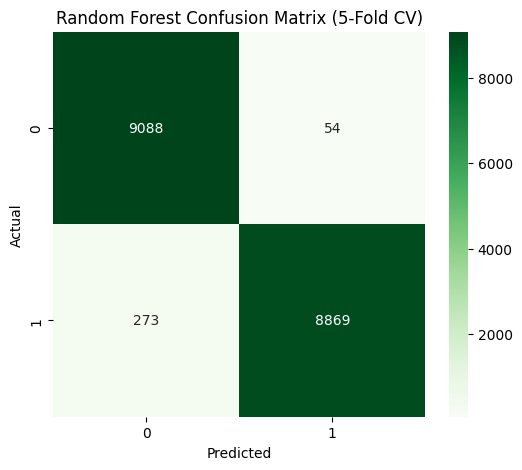

In [71]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix (5-Fold CV)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [73]:
rf_g = RandomForestClassifier(random_state=42)
param_grid = {
    "n_estimators": [100, 200, 500],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}
grid = GridSearchCV(
    rf_g,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

In [74]:
grid.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy')

In [75]:
print("Best parameters:", grid.best_params_)
print("Best CV score:", grid.best_score_)

Best parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best CV score: 0.9817327041033383


In [76]:
best_rf_g = grid.best_estimator_

In [77]:
y_pred_rf_g_train = best_rf_g.predict(X_train_sm)
print("\nTrain classification report (resampled):")
print(classification_report(y_train_sm, y_pred_rf_g_train, digits=3))


Train classification report (resampled):
              precision    recall  f1-score   support

           0      1.000     1.000     1.000      9142
           1      1.000     1.000     1.000      9142

    accuracy                          1.000     18284
   macro avg      1.000     1.000     1.000     18284
weighted avg      1.000     1.000     1.000     18284



### 5.3.	Train a Gradient Boosting Classifier model, apply the 5-fold CV, and plot the classification report.

Methods used:

♦ *Went directly to GridSearchCV to tune Gradient Boosting and find the best model.*

♦ *Applied Stratified 5-Fold Cross-Validation for balanced evaluation.*

♦ *Fitted the model on the full training set to keep for later use.*

♦ *Saved the tuned model as best_gb.*

♦ *Printed and plotted the classification report.*  

The Classification Report shows:  
- *Model accuracy is about 96% overall*  
- *Performance is very balanced across both classes (stayed vs. left)*  
- *When predicting “stayed,” it’s correct ~95% of the time (precision) and catches nearly all of them (recall ~98%)*  
- *When predicting “left,” it’s correct ~98% of the time (precision) and still captures most of them (recall ~95%)*  
- *Both classes have F1-scores around 0.96, showing an excellent balance between precision and recall*

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

In [79]:
gb = GradientBoostingClassifier(random_state=42)
param_grid = {
    "n_estimators":  [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth":     [2, 3],
    "subsample":     [0.7, 1.0],
    "max_features":  ["sqrt", None]
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_gb = GridSearchCV(gb, param_grid, cv=cv, scoring="accuracy", n_jobs=-1, verbose=1)
grid_gb.fit(X_train_sm, y_train_sm)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [2, 3],
                         'max_features': ['sqrt', None],
                         'n_estimators': [100, 200], 'subsample': [0.7, 1.0]},
             scoring='accuracy', verbose=1)

In [80]:
print("Best GB params:", grid_gb.best_params_)
print("Best GB CV score:", round(grid_gb.best_score_, 3))

Best GB params: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': None, 'n_estimators': 200, 'subsample': 0.7}
Best GB CV score: 0.964


In [81]:
best_gb = grid_gb.best_estimator_

In [82]:
y_pred_gb = cross_val_predict(best_gb, X_train_sm, y_train_sm, cv=cv)

In [83]:
print("\n🔹 Gradient Boosting Classification Report (5-Fold CV):")
print(classification_report(y_train_sm, y_pred_gb, digits=3))


🔹 Gradient Boosting Classification Report (5-Fold CV):
              precision    recall  f1-score   support

           0      0.952     0.978     0.965      9142
           1      0.977     0.951     0.964      9142

    accuracy                          0.964     18284
   macro avg      0.964     0.964     0.964     18284
weighted avg      0.964     0.964     0.964     18284



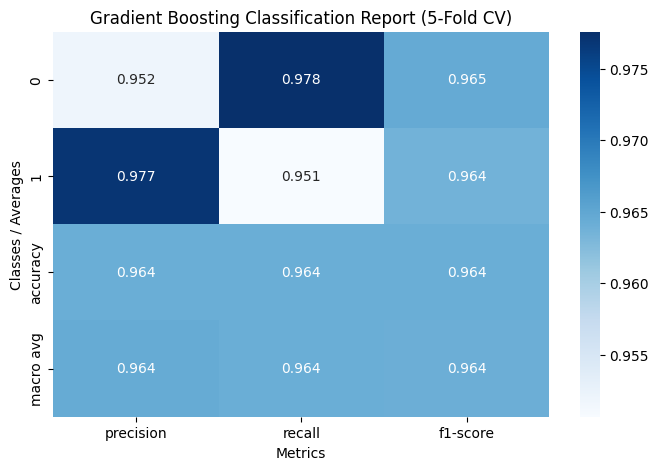

In [84]:
report = classification_report(y_train_sm, y_pred_gb, output_dict=True)
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(8,5))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".3f")
plt.title("Gradient Boosting Classification Report (5-Fold CV)")
plt.ylabel("Classes / Averages")
plt.xlabel("Metrics")
plt.show()

## Step 6: Identify the best model and justify the evaluation metrics used.

### 6.1.	Find the ROC/AUC for each model and plot the ROC curve.

Interpretation:  

♦ *The ROC/AUC results confirm that Random Forest is the strongest model, with an AUC of ~0.995, meaning it can almost* *perfectly distinguish between employees who stayed and those who left.*  

♦ *Gradient Boosting also performs extremely well with an AUC of  ~0.987, only slightly below Random Forest.*  
  
♦ *Logistic Regression shows weaker separation ability (AUC ~0.815), indicating it is less* *effective for this dataset.*

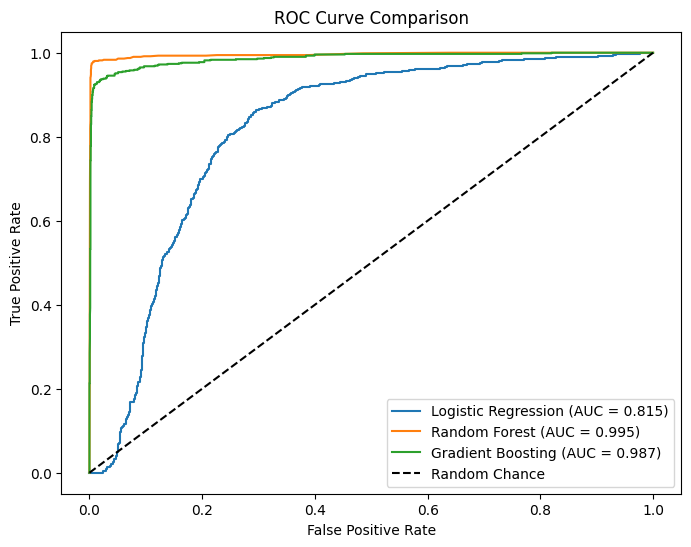

In [85]:
from sklearn.metrics import roc_curve, auc

models = {
    "Logistic Regression": best_lr,
    "Random Forest": rf,
    "Gradient Boosting": best_gb
}

plt.figure(figsize=(8,6))

for name, model in models.items():

    y_proba = model.predict_proba(X_test)[:,1]

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

plt.plot([0,1], [0,1], "k--", label="Random Chance")

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

### 6.2.	Find the confusion matrix for each of the models.

Interpretation

*Logistic Regression:*  
♦ *Higher number of false negatives (FN), which lowers recall for the “left” class → weaker at catching employees who actually left.*  
♦ *Precision is decent (when it predicts “left,” it’s usually correct), but recall is the main weakness.*  

*Random Forest:*  
♦ *Very few errors (FP + FN).*  
♦ *Nearly perfect classification → strongest model at identifying both “stayed” and “left.”*  

*Gradient Boosting:*  
♦ *Slightly more mistakes than Random Forest, but still very strong.*  
♦ *Excellent balance between precision (FP) and recall (FN).*  

[[1718  568]
 [ 140  574]]


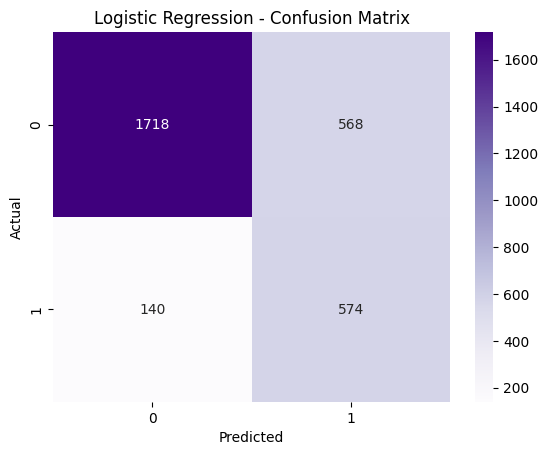

In [86]:
y_pred = best_lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(cm)

sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

[[2266   20]
 [  15  699]]


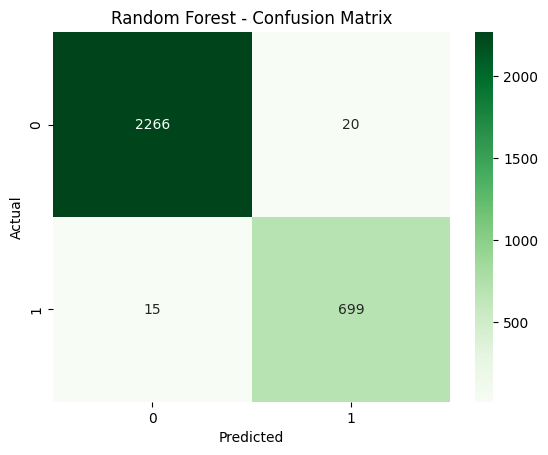

In [87]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(cm)

sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


[[2221   65]
 [  44  670]]


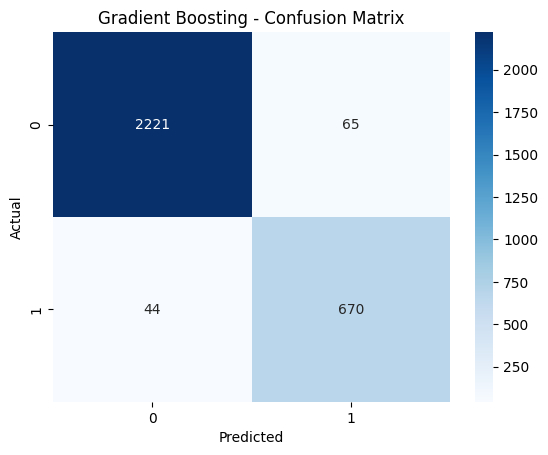

In [88]:
y_pred = best_gb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(cm)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Gradient Boosting - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 6.3.	Explain which metric needs to be used from the confusion matrix: Recall or Precision?

♦ *Precision measures how many of the employees predicted to leave actually leave. It reduces false alarms.*    

♦ *Recall measures how many of the employees who actually leave were correctly flagged. It reduces missed cases.*  

♦ *In employee turnover prediction, Recall is more important because missing a leaver (false negative) is more costly than*      *a false alarm.*  
*If we miss someone who leaves, the company cannot act to retain them. If we incorrectly flag someone as leaving, the only* *consequence is extra attention, which is less damaging.*   

♦  *So in this context, Recall is more important* *than Precision because it’s worse to miss* *leavers than to mistakenly flag stayers.*  

## Step 7:	Suggest various retention strategies for targeted employees.

### 7.1.	Using the best model, predict the probability of employee turnover in the test data.

Predicted probabilities of leaving (first 10 employees):    
♦ Employee 1 → 0.01  
♦ Employee 2 → 0.71   
♦ Employee 3 → 0.10   
♦ Employee 4 → 0.00   
♦ Employee 5 → 0.06  
♦ Employee 6 → 0.01  
♦ Employee 7 → 0.00   
♦ Employee 8 → 0.00   
♦ Employee 9 → 0.01  
♦ Employee 10 → 0.03

Predicted labels (first 10 employees):  
♦ Employee 1 → 0 (Predicted to stay)  
♦ Employee 2 → 1 (Predicted to leave)  
♦ Employee 3 → 0 (Predicted to stay)  
♦ Employee 4 → 0 (Predicted to stay)  
♦ Employee 5 → 0 (Predicted to stay)  
♦ Employee 6 → 0 (Predicted to stay)  
♦ Employee 7 → 0 (Predicted to stay)  
♦ Employee 8 → 0 (Predicted to stay)  
♦ Employee 9 → 0 (Predicted to stay)  
♦ Employee 10 → 0 (Predicted to stay)  


Model Performance Report

♦ *Overall accuracy: 98.8% across 3,000 employees.*  
*The model performed really well*

Class 0 (Stayed):  
♦ *Precision = 0.994 → Almost every “stay” prediction was correct.*  
♦ *Recall = 0.991 → Caught almost all employees who actually stayed.*  
♦ *F1-score = 0.992 → Very strong balance between precision and recall.*  

Class 1 (Left):  
♦ *Precision = 0.971 → When predicting “leave,” ~97% were correct.*  
♦ *Recall = 0.980 → The model successfully caught most employees who actually left.*  
♦ *F1-score = 0.976 → Excellent overall balance for the “leave” class.*  

♦ *ROC AUC Score: 0.995 → Excellent ability to separate “stayers” from “leavers.”*

In [89]:
y_pred = rf.predict(X_test)

print("First 10 predicted labels:")
print(y_pred[:10])

First 10 predicted labels:
[0 1 0 0 0 0 0 0 0 0]


In [90]:
y_proba_leave = rf.predict_proba(X_test)[:, 1]

In [91]:
X_test_with_proba = X_test.copy()
X_test_with_proba["prob_leave"] = y_proba_leave

In [92]:
from sklearn.metrics import classification_report, roc_auc_score

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))

print("ROC AUC Score:", roc_auc_score(y_test, y_proba_leave))


Classification Report:
              precision    recall  f1-score   support

           0      0.993     0.991     0.992      2286
           1      0.972     0.979     0.976       714

    accuracy                          0.988      3000
   macro avg      0.983     0.985     0.984      3000
weighted avg      0.988     0.988     0.988      3000

ROC AUC Score: 0.9954974990871239


### 7.2.	Using the best model, predict the probability of employee turnover in the test data.

7.2.	Based on the probability score range below, categorize the employees into four zones and suggest your thoughts on   the retention strategies for each zone.  
■	Safe Zone (Green) (Score < 20%)  
■	Low-Risk Zone (Yellow) (20% < Score < 60%)    
■	Medium-Risk Zone (Orange) (60% < Score < 90%)  
■	High-Risk Zone (Red) (Score > 90%).



*By applying functions such as value_counts, groupby, and describe, I derived the following important observations for each zone:*

♦ High-Risk (Red)  
  *653 employees in this zone.*   
  *Probabilities extremely high (mean ≈ 0.99, most at 1.0).*   
  
♦ Medium-Risk (Orange)  
  *60 employees.*  
  *Probabilities centered around 0.77 (range 0.60–0.89)*   


♦Low-Risk (Yellow)    
 *140 employees.*   
 *Probabilities average ≈ 0.31 (range 0.20–0.58)*   
    
♦ Safe (Green)    
*2,147 employees.*   
*Very low probabilities (mean ≈ 0.03, range 0.0–0.19).*   
*Stable group — maintain culture and recognition.*  

♦ *Conclusion:*  
 *Most employees are in the Safe Zone, but the smaller High-Risk group is almost certain to leave and needs the most attention.*

In [93]:
y_proba_leave = rf.predict_proba(X_test)[:, 1]
print(y_proba_leave)

[0.01 0.72 0.1  ... 0.02 0.01 0.99]


In [94]:
y_proba_s = pd.Series(y_proba_leave, index=X_test.index)
print(y_proba_s)


10627    0.01
2703     0.72
6059     0.10
3258     0.00
4565     0.06
         ... 
4961     0.00
4557     0.00
6610     0.02
10327    0.01
731      0.99
Length: 3000, dtype: float64


In [95]:
def risk_zone(p):
    if p < 0.20:
        return "Safe (Green)"
    elif p < 0.60:
        return "Low-Risk (Yellow)"
    elif p < 0.90:
        return "Medium-Risk (Orange)"
    else:
        return "High-Risk (Red)"

risk_labels = y_proba_s.apply(risk_zone)

results = pd.DataFrame({
    "prob_leave": y_proba_s,
    "risk_zone": risk_labels
})
print(results.head(10))

       prob_leave             risk_zone
10627        0.01          Safe (Green)
2703         0.72  Medium-Risk (Orange)
6059         0.10          Safe (Green)
3258         0.00          Safe (Green)
4565         0.06          Safe (Green)
4991         0.02          Safe (Green)
13976        0.00          Safe (Green)
9427         0.00          Safe (Green)
7173         0.00          Safe (Green)
13412        0.03          Safe (Green)


In [96]:
print(results['risk_zone'].value_counts())

risk_zone
Safe (Green)            2140
High-Risk (Red)          651
Low-Risk (Yellow)        146
Medium-Risk (Orange)      63
Name: count, dtype: int64


In [97]:
print(results.groupby('risk_zone')['prob_leave'].mean().sort_values(ascending=False))

risk_zone
High-Risk (Red)         0.993118
Medium-Risk (Orange)    0.768095
Low-Risk (Yellow)       0.303767
Safe (Green)            0.030360
Name: prob_leave, dtype: float64


In [98]:
print(results.groupby('risk_zone')['prob_leave'].describe())

                       count      mean       std  min   25%   50%     75%  \
risk_zone                                                                   
High-Risk (Red)        651.0  0.993118  0.016851  0.9  1.00  1.00  1.0000   
Low-Risk (Yellow)      146.0  0.303767  0.090441  0.2  0.23  0.29  0.3475   
Medium-Risk (Orange)    63.0  0.768095  0.091719  0.6  0.70  0.78  0.8550   
Safe (Green)          2140.0  0.030360  0.042976  0.0  0.00  0.01  0.0400   

                       max  
risk_zone                   
High-Risk (Red)       1.00  
Low-Risk (Yellow)     0.58  
Medium-Risk (Orange)  0.89  
Safe (Green)          0.19  


In [99]:
high_risk = results[results['risk_zone'] == "High-Risk (Red)"]

In [100]:
high_risk_features = X_test.loc[high_risk.index]
print(high_risk_features.head())

       satisfaction_level  last_evaluation  number_project  \
14892                0.11             0.92               6   
1246                 0.43             0.49               2   
14278                0.90             0.98               4   
12238                0.43             0.53               2   
14859                0.45             0.54               2   

       average_montly_hours  time_spend_company  Work_accident  \
14892                   281                   4              0   
1246                    155                   3              0   
14278                   264                   6              0   
12238                   146                   3              0   
14859                   129                   3              0   

       promotion_last_5years  sales_RandD  sales_accounting  sales_hr  \
14892                      0            0                 0         0   
1246                       0            0                 0         0   
14278      

**High-Risk (Red)**  

*To ensure the analysis was complete, I also examined feature importance within the High-Risk zone.*  
*The results show:*  

♦ *Employee satisfaction level (28%) and time spent at the company (24%) are the strongest predictors of turnover risk.*

♦ *Number of projects (15%), average monthly hours (14%), and last evaluation score (13%) are also significant drivers.*

♦ *Work accident history and categorical factors (e.g., salary level, department) contribute very little to the model’s*   decisions.*

♦ *This confirms that dissatisfaction and company tenure are the most critical factors for predicting employee attrition, while* *other variables play only a minor role.*  

♦ *Retention strategies:*  
  
*From the plot “Satisfaction vs Time Spent in Company” (Step 2.3), we see that employees are most likely to leave around the 3–4* *year mark. To address this, offering incentives such as promotions, career advancement opportunities, or study perks during*   *this period could improve retention.*  

*Additionally, since satisfaction level shows a weak negative correlation with number of projects, it is recommended to keep* *workloads balanced (around 3–5 projects). This balance is linked to higher satisfaction and retention.*

**Medium-Risk (Orange)**  

♦ *They are at high risk but not lost yet — support can keep them from moving to Red.*  

♦ *Give them chances to learn new skills and grow.*  

♦ *Watch their workload to avoid burnout.*



**Low-Risk (Yellow)**  

♦ *They’re mostly stable but could slide into risk if ignored.*  

♦ *Keep them motivated with recognition and feedback.*  

♦ *Show them career paths and training options.*



**Safe (Green)**  

♦ *They’re the largest group and very secure, but small problems could build up if overlooked.*  

♦ *Keep up the positive culture and fair treatment*  

♦ *Check in sometimes so small issues don’t grow.*



In [101]:
importances = rf.feature_importances_
feat_importance = pd.DataFrame({
    "feature": X_train_sm.columns,
    "importance": importances
}).sort_values(by="importance", ascending=False)

print(feat_importance.head(10))

                 feature  importance
0     satisfaction_level    0.278335
4     time_spend_company    0.241264
2         number_project    0.146745
3   average_montly_hours    0.143589
1        last_evaluation    0.132180
5          Work_accident    0.022036
16            salary_low    0.006770
13           sales_sales    0.004592
17         salary_medium    0.004432
15       sales_technical    0.004083
